# Boxplots

(c) 2023-2024 Nick Falk, Rob Edwards

These boxplots are based on Nick's boxplot data, but this uses the "new" format taxonomy data that is the same for MGI and MinION

**Note:** This data uses the raw counts, so if there is a read present we will report that as being detected!

In [42]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multitest import multipletests

In [25]:
df = pd.read_csv("../MinION/Taxonomy/Minion_read_based_annotations_species_rawcounts.tsv.gz", sep='\t', compression='gzip')
df = df[df['taxonomy'].str.contains('k__Bacteria')]
df = df[~df['taxonomy'].str.endswith('s__')]
df = df[~df['taxonomy'].str.contains('g__;')]
genus_otu = df.set_index('taxonomy')
genus_otu.index = genus_otu.index.str.split(';').str[-1].str.replace('s__', '')
genus_otu.head()

,825012_20181120_S,698917_20171207_S,1586713_20180309_S,748160_20180321_S,1593973_20180504_S,1316979_20171215_S,756934_20181218_S,983493_20180123_S,892355_20180123_S,1651490_20171010_S,...,788707_20180313_S,1565754_20180403_S,639354_20171206_S,1593973_20180427_S,788707_20171213_S,1316935_20180417_S,1565754_20171128_S,785991_20180321_S,658355_20171204_S,748699_20180410_S
taxonomy,,,,,,,,,,,,,,,,,,,,,
Candidatus Stahlbacteria bacterium,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Candidatus Chromulinivorax destructor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bradymonas sediminis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Microvenator marinus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Candidatus Acidulodesulfobacterium acidiphilum,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Normalization/Transformation
# Square root transform
sqrt_genus = np.sqrt(genus_otu)

# Transpose the taxa table
genus_otu2 = sqrt_genus.T
genus_otu2.head()

taxonomy,Candidatus Stahlbacteria bacterium,Candidatus Chromulinivorax destructor,Bradymonas sediminis,Microvenator marinus,Candidatus Acidulodesulfobacterium acidiphilum,Acanthopleuribacter pedis,Candidatus Sulfopaludibacter sp. SbA4,Edaphobacter aggregans,Granulicella sp. WH15,Candidatus Sulfotelmatobacter sp. SbA7,...,Pelagicoccus mobilis,Puniceicoccus vermicola,Chthoniobacter flavus,Pedosphaera sp. Tous-C6FEB,Akkermansia muciniphila,Akkermansia sp.,Brevifollis gellanilyticus,Luteolibacter marinus,Verrucomicrobium sp. GAS474,Candidatus Eremiobacter sp. RRmetagenome_bin22
825012_20181120_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
698917_20171207_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1586713_20180309_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
748160_20180321_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1593973_20180504_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
with open('genus_species.txt', 'w') as out:
    print("\n".join(sorted(list(genus_otu2.columns))), file=out)

In [28]:
# Load metadata table
metadata = pd.read_csv("../MinION/Metadata/FINAL_METADATA_MINION.csv.gz", encoding='windows-1252', compression='gzip', index_col=0)
if metadata.shape[0] != genus_otu2.shape[0]:
    print("ERROR: your metadata is probably from the minion data and not the MGI data. Please double check!", file=sys.stderr)
metadata.head()

,#NAME,minion_ID,MGI_ID_from_fastq.gz,Patient,Sample date,IP vs OP,Hospital,Room,Age,Age groups,...,Sample type,DNA_extraction_ conc,#NAME.1,ULN,Sample name,Conc. (ng/ul),Index I7,Index I5,Mean_Size_BP,Total_Clusters_Passing_Filter_(Million)
#NAME_From sequences,,,,,,,,,,,,,,,,,,,,,
623361_20180123_S,623361_20180123_S,623361_20180123_S,623361_20180123_S,623361,23/01/2018,OP,RAH,Chest Clinic 9,18,4,...,Sputum,0.778,623361_20180123_S,SAGCFN_22_01764,623361_20180123_S,33.60,GAGATTCC,GGCTCTGA,468,2.4
639354_20171206_S,639354_20171206_S,639354_20171206_S,639354_20171206_S,639354,6/12/2017,IP,WCH,Adolescent 10,17,3,...,Sputum,3.540,639354_20171206_S,SAGCFN_22_01742,639354_20171206_S,20.80,ATTACTCG,TAATCTTA,337,4.9
642660_20180601_S,642660_20180601_S,642660_20180601_S,642660_20180601_S,642660,1/06/2018,IP,WCH,Adol Rm 11,17,3,...,Sputum,0.538,642660_20180601_S,SAGCFN_22_01780,642660_20180601_S,21.80,GAATTCGT,GGCTCTGA,491,4.8
650003_20180207_S,650003_20180207_S,650003_20180207_S,650003_20180207_S,650003,7/02/2018,IP,WCH,Adol Room 1,17,3,...,Sputum,0.552,650003_20180207_S,SAGCFN_22_01778,650003_20180207_S,8.28,GAATTCGT,ATAGAGGC,476,5.7
658355_20171204_S,658355_20171204_S,658355_20171204_S,658355_20171204_S,658355,4/12/2017,OP,WCH,Gilbert S Meeting,16,3,...,Sputum,0.433,658355_20171204_S,SAGCFN_22_01789,658355_20171204_S,16.60,CTGAAGCT,AGGCGAAG,507,4.5


In [29]:
# Add "X" character to the beginning of each row name in the metadata table
# We skip this, because it is an R thing, I don't think you can have indexes that start with integers in R?
# metadata.index = 'X' + metadata.index.astype(str)

In [30]:
# Merge the taxa table and metadata table by the shared row names
merged1 = pd.merge(metadata, genus_otu2, left_index=True, right_index=True)
merged1.head()

,#NAME,minion_ID,MGI_ID_from_fastq.gz,Patient,Sample date,IP vs OP,Hospital,Room,Age,Age groups,...,Pelagicoccus mobilis,Puniceicoccus vermicola,Chthoniobacter flavus,Pedosphaera sp. Tous-C6FEB,Akkermansia muciniphila,Akkermansia sp.,Brevifollis gellanilyticus,Luteolibacter marinus,Verrucomicrobium sp. GAS474,Candidatus Eremiobacter sp. RRmetagenome_bin22
623361_20180123_S,623361_20180123_S,623361_20180123_S,623361_20180123_S,623361,23/01/2018,OP,RAH,Chest Clinic 9,18,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.414214
639354_20171206_S,639354_20171206_S,639354_20171206_S,639354_20171206_S,639354,6/12/2017,IP,WCH,Adolescent 10,17,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
642660_20180601_S,642660_20180601_S,642660_20180601_S,642660_20180601_S,642660,1/06/2018,IP,WCH,Adol Rm 11,17,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000000
650003_20180207_S,650003_20180207_S,650003_20180207_S,650003_20180207_S,650003,7/02/2018,IP,WCH,Adol Room 1,17,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
658355_20171204_S,658355_20171204_S,658355_20171204_S,658355_20171204_S,658355,4/12/2017,OP,WCH,Gilbert S Meeting,16,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [31]:
# Convert the columns of interest to categorical type (similar to R factors)
# Note, python allows spaces in column names!
culture_columns = [
    'CMS_Pseudomonas aeruginosa',
    'CMS_Stenophotomonas maltophilia',
    'NTM',
    'CMS_Mycobacteroides abscessus',
    'CMS_Mycobacterium intracellulare',
    'CMS_Staphylococcus  aureus',
    'CMS_Achromobacter xylosoxidans',
    'CMS_Burkholderia cepacia',
    'CMS_Haemophilus influenzae'
]

culture_pairs = {
    'CMS_Pseudomonas aeruginosa' : 'Pseudomonas aeruginosa',
    'CMS_Stenophotomonas maltophilia': 'Stenotrophomonas maltophilia',
    'NTM' : 'Mycobacterium avium',
    'CMS_Mycobacteroides abscessus' : 'Mycobacteroides abscessus',
    'CMS_Mycobacterium intracellulare' : 'Mycobacterium avium',
    'CMS_Staphylococcus  aureus' : 'Staphylococcus aureus',
    'CMS_Achromobacter xylosoxidans' : 'Achromobacter xylosoxidans',
    'CMS_Burkholderia cepacia' : 'Burkholderia cepacia',
    'CMS_Haemophilus influenzae' : 'Haemophilus influenzae'
}


# we don't need to convert to categories.
for col in culture_columns:
    merged1[col] = merged1[col].astype('category')


In [32]:
# Step 2: Create Boxplots
def create_boxplot(data, culture_taxa, taxa):
    subset_data = data[data[culture_taxa].notna()]
    plt.figure(figsize=(10, 6))
    # sns.boxplot(x=culture_taxa, y=taxa, data=subset_data, color='black', boxprops=dict(facecolor='white'))
    sns.violinplot(x=culture_taxa, y=taxa, data=subset_data, hue=culture_taxa, palette='rocket_r', alpha=0.5)
    sns.stripplot(x=culture_taxa, y=taxa, data=subset_data, color='black', jitter=True, alpha=0.5)
    plt.title("")
    plt.xlabel("")
    plt.ylabel("Abundance in Patient")
    plt.xticks(ticks=[0, 1], labels=["Negative Culture", "Positive Culture"])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

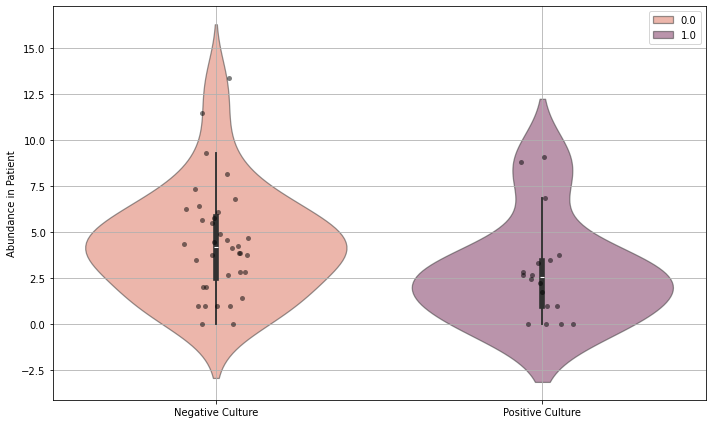

In [33]:
# Example usage
create_boxplot(merged1, "CMS_Pseudomonas aeruginosa", "Pseudomonas aeruginosa")

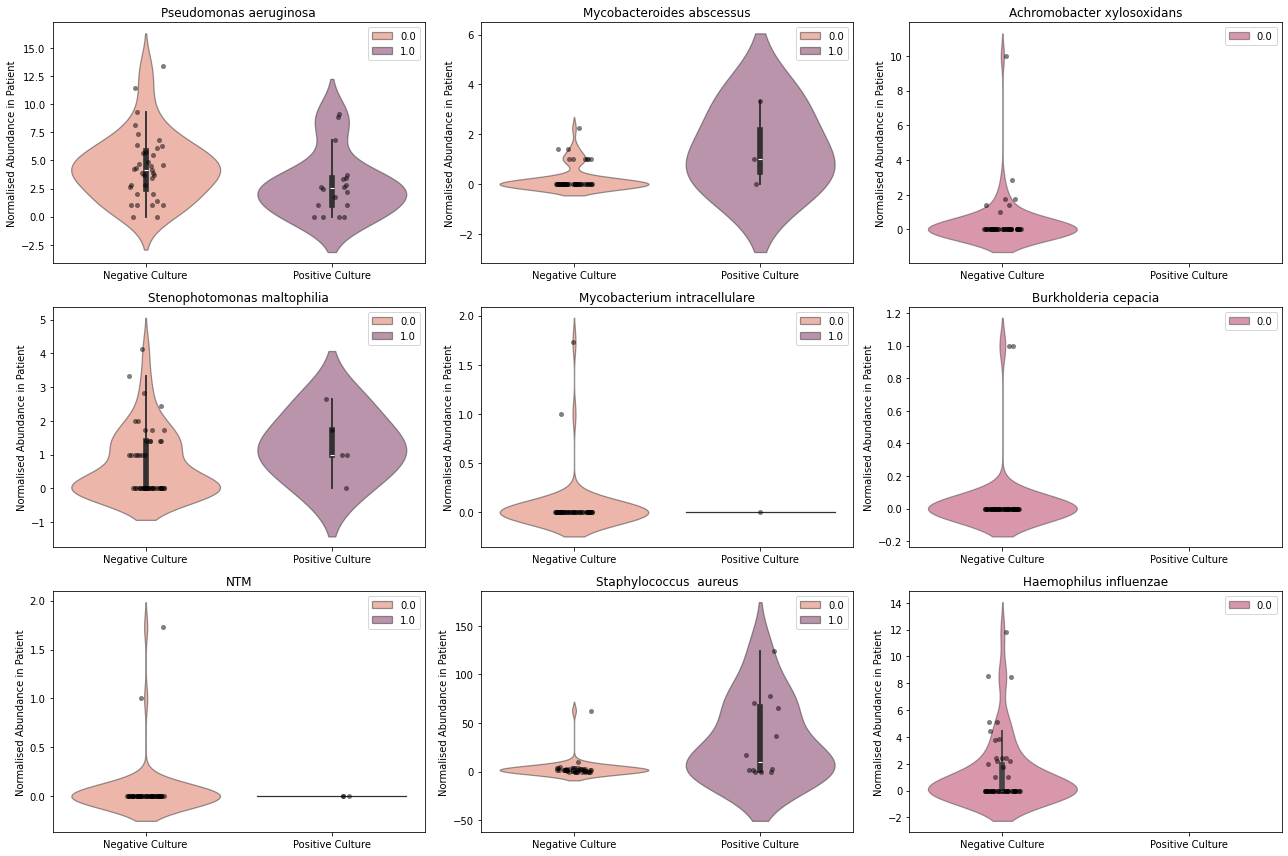

In [35]:
fig, ax = plt.subplots(figsize=(18, 12), nrows=3, ncols=3, sharex=False, sharey=False)

k = 0
for i in [0, 1, 2]:
    for j in [0, 1, 2]:
        culture_taxa = culture_columns[k]
        taxa = culture_pairs[culture_taxa]
        subset_data = merged1[merged1[culture_taxa].notna()]
        g = sns.violinplot(x=culture_taxa, y=taxa, data=subset_data, hue=culture_taxa, palette='rocket_r', alpha=0.5, ax=ax[j][i])
        g = sns.stripplot(x=culture_taxa, y=taxa, data=subset_data, color='black', jitter=True, alpha=0.5, ax=ax[j][i])
        g.set_xlabel("")
        g.set_ylabel("Normalised Abundance in Patient")
        g.set_xlim(-0.5, 1.5)
        g.set_xticks(ticks=[0, 1], labels=["Negative Culture", "Positive Culture"])
        g.set_title(culture_taxa.replace('CMS_', ''))
        k+=1
        

plt.tight_layout()
plt.show()
        


In [36]:
# Step 3: Additionally Stats Tests
# Perform Kruskal-Wallis Test
kruskal_stat, p_value = stats.kruskal(
    merged1.loc[merged1['CMS_Pseudomonas aeruginosa'] == 0.0, 'Pseudomonas aeruginosa'],
    merged1.loc[merged1['CMS_Pseudomonas aeruginosa'] == 1.0, 'Pseudomonas aeruginosa']
)
print(f'Kruskal-Wallis Test statistic: {kruskal_stat}, p-value: {p_value}')

Kruskal-Wallis Test statistic: 4.986610898661566, p-value: 0.02554419167762898


In [37]:
# Calculate median
g__CMS_Pseudomonas_aeruginosa_median = merged1.groupby('CMS_Pseudomonas aeruginosa', observed=True)['Pseudomonas aeruginosa'].median()
print(g__CMS_Pseudomonas_aeruginosa_median)

CMS_Pseudomonas aeruginosa
0.0    4.182873
1.0    2.547621
Name: Pseudomonas aeruginosa, dtype: float64


In [38]:
# Filter to get the threshold value for hits in the "0" grouping
threshold_CMS_Pseudomonas_aeruginosa = g__CMS_Pseudomonas_aeruginosa_median.loc[1]
print(threshold_CMS_Pseudomonas_aeruginosa)

2.5476205269238843


In [39]:
# Find row names where the value is above the threshold
above_threshold_rownames_CMS_Pseudomonas_aeruginosa = merged1[
    (merged1['CMS_Pseudomonas aeruginosa'] == 0) &
    (merged1['Pseudomonas aeruginosa'] > threshold_CMS_Pseudomonas_aeruginosa)
].index.tolist()
# Print the row names
print(above_threshold_rownames_CMS_Pseudomonas_aeruginosa)

['642660_20180601_S', '658355_20171204_S', '658355_20180122_S', '676138_20180130_S', '715927_20180205_S', '748699_20180329_S', '748699_20180410_S', '753522_20180606_S', '756934_20181218_S', '763742_20180129_S', '768745_20171123_S', '770590_20180115_S', '778851_20171204_S', '785991_20171129_S', '785991_20171206_S', '785991_20180321_S', '788707_20181116_S', '825012_20181120_S', '825012_20181126_S', '875028_20180115_S', '892355_20180123_S', '1068841_20180306_S', '1586713_20180309_S', '1651490_20171010_S', '1651490_20180206_S', '1834617_20180501_S', '1845116_20180403_S']


In [40]:
# Save results to CSV
pd.DataFrame(above_threshold_rownames_CMS_Pseudomonas_aeruginosa).to_csv("CMS_Pseudomonas.aeruginosa.csv", index=False)

In [41]:
# Run pairwise Wilcoxon test on groups within a column


results = stats.wilcoxon(
    merged1['Pseudomonas aeruginosa'][merged1['CMS_Pseudomonas aeruginosa'] == 0],
    merged1['Pseudomonas aeruginosa'][merged1['CMS_Pseudomonas aeruginosa'] == 1]
)

p_adj = multipletests([results.pvalue], method='fdr_bh')[1][0]
print(f'Adjusted p-value for pairwise test: {p_adj}')


ValueError: The samples x and y must have the same length.